In [1]:
import pandas as pd
data = pd.read_csv('ML_DATA.csv', low_memory=False)
data.head()

,Age,Height (ft-in),Weight (lb),Shoulder Pain,R/L/B/P,Bra Color,Bra Size,Embroidery,Jacquard,Bra Style,...,Brand,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure
0,69,"5'3""",135,N,R,black,40A,N,N,Amber Bra,...,Amoena,N,N,N,Y,Y,Y,N,Y,B
1,77,"5'0""",165,N,L,black,42AA,N,N,Amber Bra,...,Amoena,N,N,N,Y,Y,Y,N,Y,B
2,58,"5'2""",142,N,L,black,38D,N,N,Amber Bra,...,Amoena,N,N,N,Y,Y,Y,N,Y,B
3,53,"5'1""",151,N,L,black,36A,N,N,Amber Bra,...,Amoena,N,N,N,Y,Y,Y,N,Y,B
4,63,"5'10""",170,N,R,black,40D,N,N,Amber Bra,...,Amoena,N,N,N,Y,Y,Y,N,Y,B


In [2]:
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("\'")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace('"',''))
    return (12*ft_) + in_

def band_size(size):
    band = int(size[0:2])
    return band

def cup_size(size):
    cup = size[2:]
    return cup

In [3]:
data["Ht (inches)"] = data["Height (ft-in)"].apply(lambda x:parse_ht(x))

In [4]:
data["Band Size"] = data["Bra Size"].apply(lambda x:band_size(x))
data["Cup Size"] = data["Bra Size"].apply(lambda x:cup_size(x))

In [5]:
data.head()

,Age,Height (ft-in),Weight (lb),Shoulder Pain,R/L/B/P,Bra Color,Bra Size,Embroidery,Jacquard,Bra Style,...,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Ht (inches),Band Size,Cup Size
0,69,"5'3""",135,N,R,black,40A,N,N,Amber Bra,...,N,Y,Y,Y,N,Y,B,63.0,40,A
1,77,"5'0""",165,N,L,black,42AA,N,N,Amber Bra,...,N,Y,Y,Y,N,Y,B,60.0,42,AA
2,58,"5'2""",142,N,L,black,38D,N,N,Amber Bra,...,N,Y,Y,Y,N,Y,B,62.0,38,D
3,53,"5'1""",151,N,L,black,36A,N,N,Amber Bra,...,N,Y,Y,Y,N,Y,B,61.0,36,A
4,63,"5'10""",170,N,R,black,40D,N,N,Amber Bra,...,N,Y,Y,Y,N,Y,B,70.0,40,D


In [6]:
list(data.columns)

['Age',
 'Height (ft-in)',
 'Weight (lb)',
 'Shoulder Pain',
 'R/L/B/P',
 'Bra Color',
 'Bra Size',
 'Embroidery',
 'Jacquard',
 'Bra Style',
 'Difficulty Reaching Back',
 'Brand',
 'Wide Straps',
 'Padded Straps',
 'Wired',
 'Molded Foam',
 'Smooth Cup',
 'Has Lace Details',
 'Active',
 'Lace Inset',
 'Front/Back Closure',
 'Ht (inches)',
 'Band Size',
 'Cup Size']

In [7]:
new_df = data[['Age',
 'Weight (lb)',
 'Ht (inches)',
 'Band Size',
 'Cup Size',
 'R/L/B/P',
 'Shoulder Pain',
 'Bra Color',
 'Brand',
 'Wide Straps',
 'Padded Straps',
 'Wired',
 'Molded Foam',
 'Smooth Cup',
 'Has Lace Details',
 'Active',
 'Lace Inset',
 'Front/Back Closure',
 'Difficulty Reaching Back',
 'Embroidery',
 'Jacquard',               
 'Bra Style']]

In [8]:
len(new_df.columns)

22

In [9]:
# import 
import numpy as np
import pandas as pd

X = new_df.select_dtypes(include=[object])
X.head(3)

,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard,Bra Style
0,A,R,N,black,Amoena,N,N,N,Y,Y,Y,N,Y,B,N,N,N,Amber Bra
1,AA,L,N,black,Amoena,N,N,N,Y,Y,Y,N,Y,B,N,N,N,Amber Bra
2,D,L,N,black,Amoena,N,N,N,Y,Y,Y,N,Y,B,N,N,N,Amber Bra


In [10]:
data_to_be_encoded = X.iloc[:,:-1]
data_to_be_encoded.head()

,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard
0,A,R,N,black,Amoena,N,N,N,Y,Y,Y,N,Y,B,N,N,N
1,AA,L,N,black,Amoena,N,N,N,Y,Y,Y,N,Y,B,N,N,N
2,D,L,N,black,Amoena,N,N,N,Y,Y,Y,N,Y,B,N,N,N
3,A,L,N,black,Amoena,N,N,N,Y,Y,Y,N,Y,B,N,N,N
4,D,R,N,black,Amoena,N,N,N,Y,Y,Y,N,Y,B,N,N,N


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_2 = data_to_be_encoded.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
X_2.head()

,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard
0,0,4,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0
1,1,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0
2,4,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0
4,4,4,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0


In [12]:
int_df = new_df[["Age", "Weight (lb)", "Ht (inches)", "Band Size"]]
int_df.head()

,Age,Weight (lb),Ht (inches),Band Size
0,69,135,63.0,40
1,77,165,60.0,42
2,58,142,62.0,38
3,53,151,61.0,36
4,63,170,70.0,40


In [13]:
encoded_df = int_df.join(X_2)

encoded_df.head()

,Age,Weight (lb),Ht (inches),Band Size,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,...,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard
0,69,135,63.0,40,0,4,0,0,1,0,...,0,1,1,1,0,1,0,0,0,0
1,77,165,60.0,42,1,1,0,0,1,0,...,0,1,1,1,0,1,0,0,0,0
2,58,142,62.0,38,4,1,0,0,1,0,...,0,1,1,1,0,1,0,0,0,0
3,53,151,61.0,36,0,1,0,0,1,0,...,0,1,1,1,0,1,0,0,0,0
4,63,170,70.0,40,4,4,0,0,1,0,...,0,1,1,1,0,1,0,0,0,0


In [14]:
final_clean_df = encoded_df.join(new_df["Bra Style"])
final_clean_df.head()

,Age,Weight (lb),Ht (inches),Band Size,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,...,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard,Bra Style
0,69,135,63.0,40,0,4,0,0,1,0,...,1,1,1,0,1,0,0,0,0,Amber Bra
1,77,165,60.0,42,1,1,0,0,1,0,...,1,1,1,0,1,0,0,0,0,Amber Bra
2,58,142,62.0,38,4,1,0,0,1,0,...,1,1,1,0,1,0,0,0,0,Amber Bra
3,53,151,61.0,36,0,1,0,0,1,0,...,1,1,1,0,1,0,0,0,0,Amber Bra
4,63,170,70.0,40,4,4,0,0,1,0,...,1,1,1,0,1,0,0,0,0,Amber Bra


In [15]:
target = final_clean_df["Bra Style"]
data = final_clean_df.drop("Bra Style", axis=1)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import tree



In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [18]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9680851063829787

In [19]:
dtc.predict([[69, 62, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]])

array(['Zipper Sports MDSP Bra'], dtype=object)

In [20]:

# Save the model for decision tree
import pickle
filename = 'decision_tree_finalized_model.sav'
pickle.dump(dtc, open(filename, 'wb'))
 

In [21]:

# Run decision tree model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9680851063829787


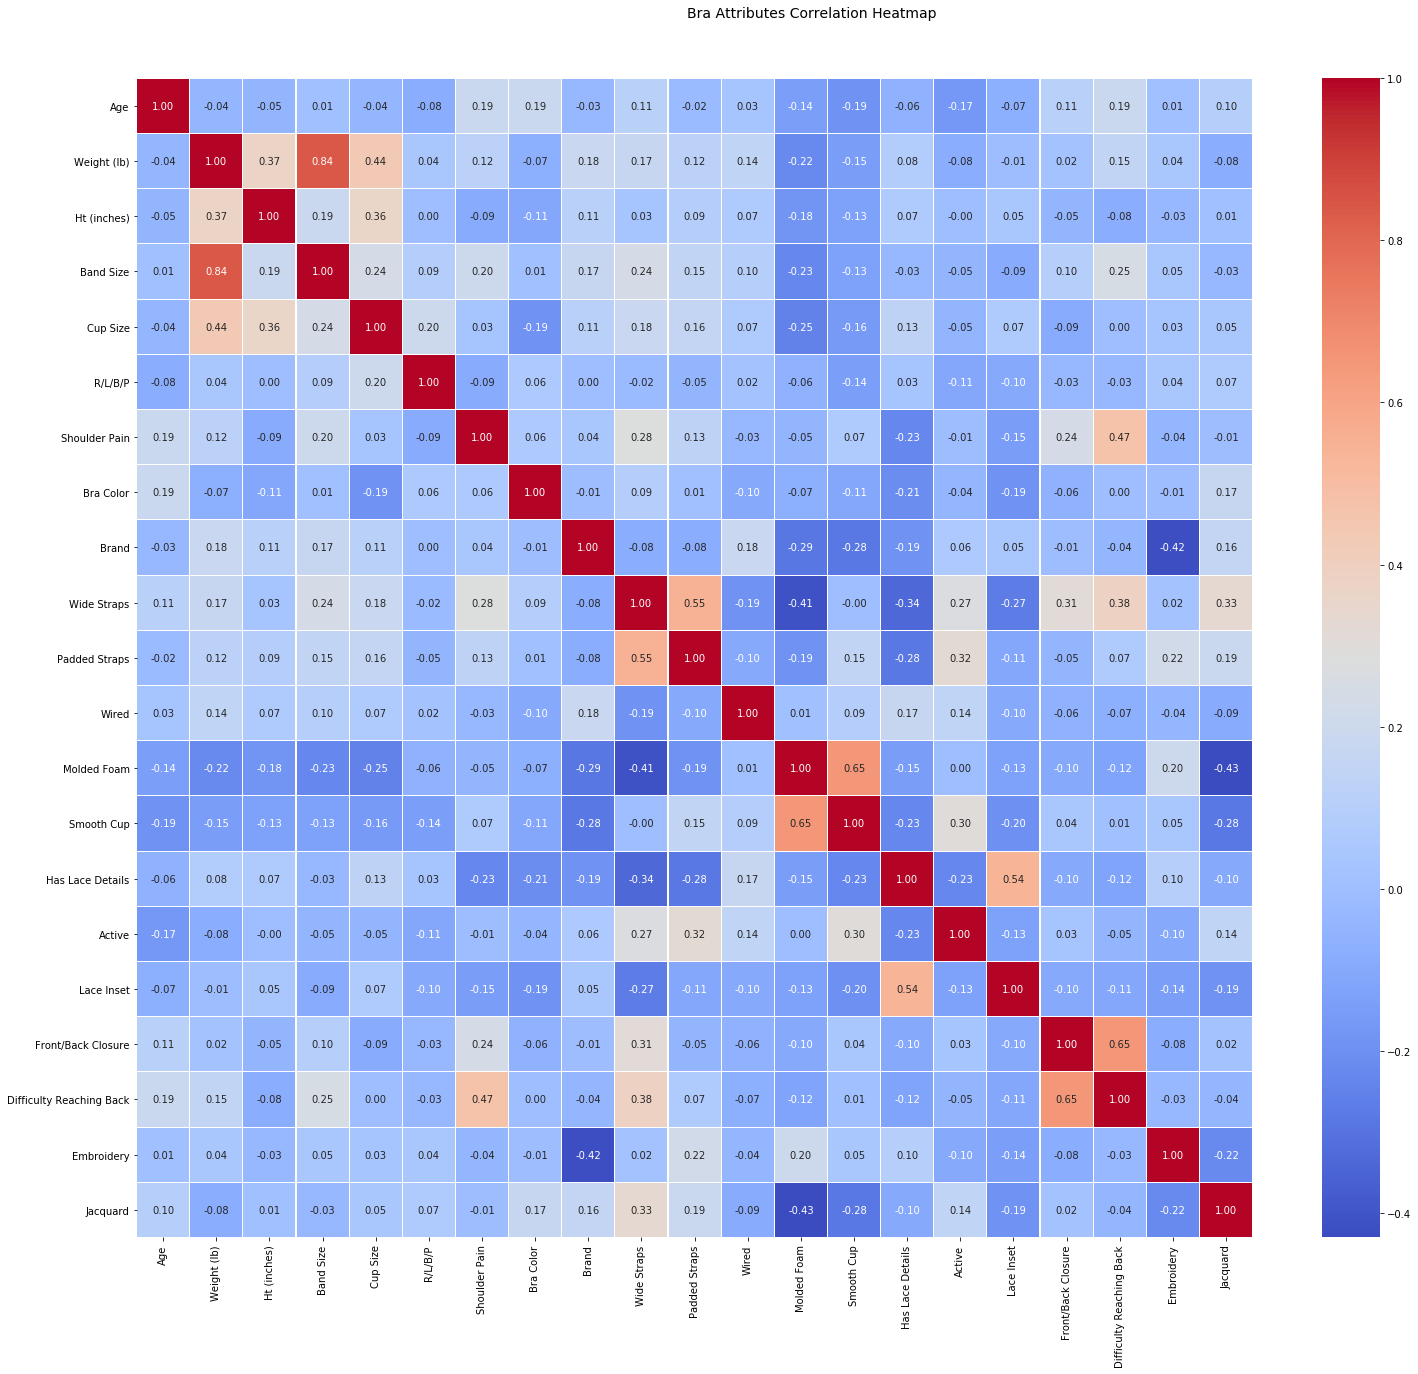

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 6))
corr = final_clean_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
fig = plt.gcf()
fig.set_size_inches(25, 20)
t= f.suptitle('Bra Attributes Correlation Heatmap', fontsize=14)

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_encoded = X.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
df_encoded.head()

,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard,Bra Style
0,0,4,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0
1,1,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0
2,4,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0
3,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0
4,4,4,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0


In [24]:
hm_encoded_df = int_df.join(df_encoded)

hm_encoded_df.head()

,Age,Weight (lb),Ht (inches),Band Size,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,...,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard,Bra Style
0,69,135,63.0,40,0,4,0,0,1,0,...,1,1,1,0,1,0,0,0,0,0
1,77,165,60.0,42,1,1,0,0,1,0,...,1,1,1,0,1,0,0,0,0,0
2,58,142,62.0,38,4,1,0,0,1,0,...,1,1,1,0,1,0,0,0,0,0
3,53,151,61.0,36,0,1,0,0,1,0,...,1,1,1,0,1,0,0,0,0,0
4,63,170,70.0,40,4,4,0,0,1,0,...,1,1,1,0,1,0,0,0,0,0


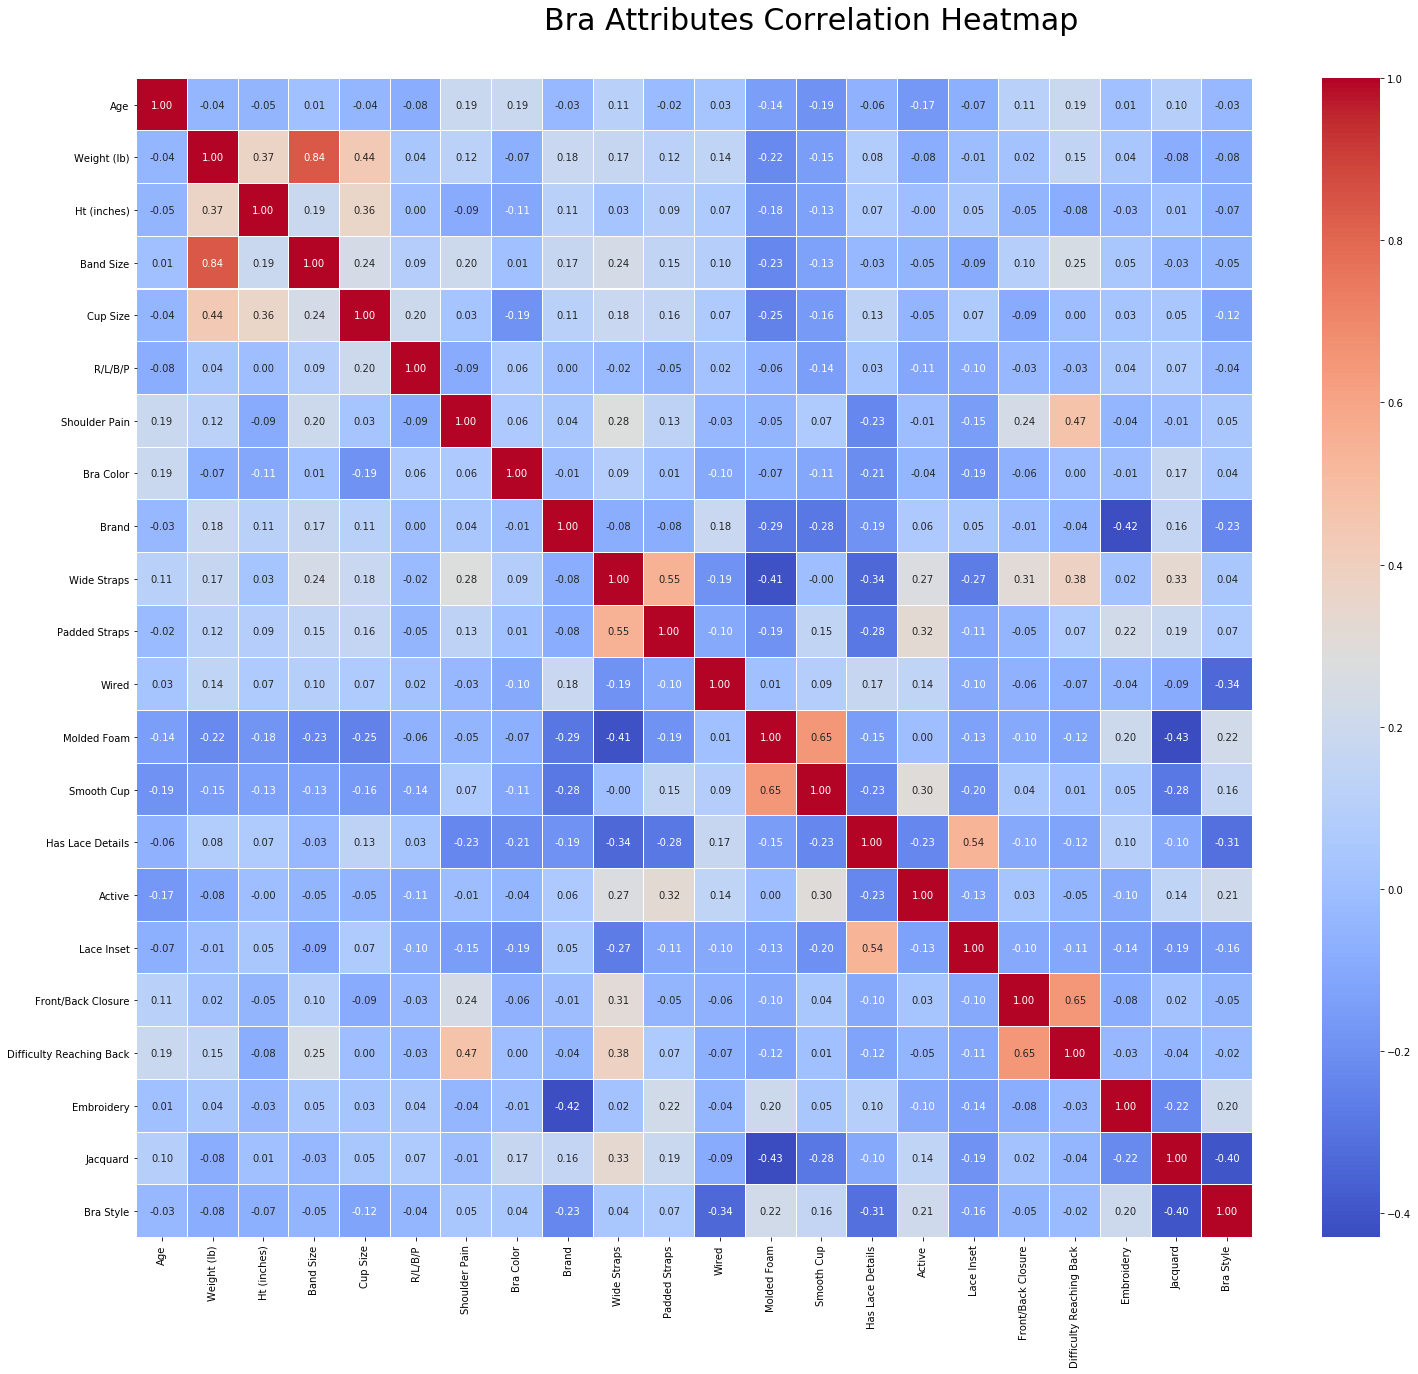

In [25]:
f, ax = plt.subplots(figsize=(10, 6))
corr = hm_encoded_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
fig = plt.gcf()
fig.set_size_inches(25, 20)
t= f.suptitle('Bra Attributes Correlation Heatmap', fontsize=30)